<a href="https://colab.research.google.com/github/Yilder02/SyS_2025-1/blob/main/Parciales_SyS/Parcial%202_SyS/Preguntas_parcial_2_simualciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YILDER RAFAEL EPIAYU GONZALEZ
# 1. Simulación: Verificación de la Propiedad de Modulación

En esta primera simulación, nuestro objetivo es demostrar visualmente la **propiedad de modulación** de la Transformada de Fourier. Específicamente, verificaremos que la transformada de una función $x(t)$ multiplicada por una portadora senoidal se expresa como:

$$
\mathcal{F}\{x(t)\sin(\omega_c t)\} = \frac{1}{2j} [X(\omega - \omega_c) - X(\omega + \omega_c)]
$$

Para lograrlo, definiremos una señal de prueba $x(t)$ (un pulso rectangular) y calcularemos numéricamente la Transformada Rápida de Fourier (FFT) de la señal modulada $y(t) = x(t)\sin(\omega_c t)$. Luego, compararemos este resultado numérico con el resultado teórico obtenido al desplazar la transformada de $x(t)$ en el dominio de la frecuencia.

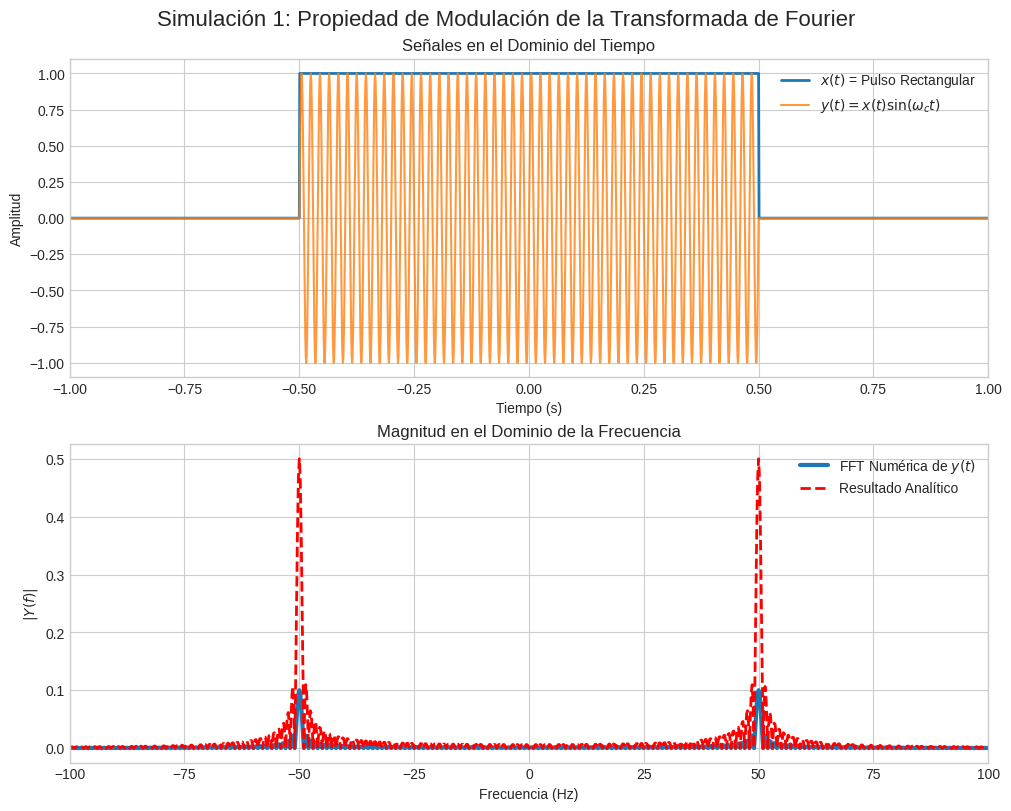

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift, fftfreq

# --- 1. Definición de la señal y parámetros ---
fs = 1000  # Frecuencia de muestreo
T = 5.0    # Duración de la señal en segundos
t = np.arange(-T/2, T/2, 1/fs) # Vector de tiempo centrado en cero

# x(t): Un pulso rectangular de ancho 1
x_t = np.zeros_like(t)
x_t[np.abs(t) < 0.5] = 1.0

# Frecuencia de la portadora senoidal (en rad/s y Hz)
wc = 50 * 2 * np.pi  # Frecuencia angular de la portadora
fc = wc / (2 * np.pi)

# y(t): Señal x(t) modulada por la portadora senoidal
y_t = x_t * np.sin(wc * t)

# --- 2. Cálculo Numérico (FFT) y Analítico ---
# Transformada de Fourier numérica de y(t)
N = len(t)
yf_numerical = fftshift(fft(y_t)) / N
freqs = fftshift(fftfreq(N, 1/fs))
w_freqs = 2 * np.pi * freqs # Frecuencias en rad/s

# Transformada de Fourier analítica de x(t) = rect(t) -> X(w) = sinc(w / 2*pi)
# Ojo: np.sinc es la versión normalizada sinc(t) = sin(pi*t)/(pi*t)
X_w = np.sinc(w_freqs / (2 * np.pi))

# Transformada analítica de y(t) usando la propiedad
# Y(w) = (X(w-wc) - X(w+wc)) / 2j
Y_w_analytical = (np.sinc((w_freqs - wc) / (2 * np.pi)) - np.sinc((w_freqs + wc) / (2 * np.pi))) / (2j)


# --- 3. Gráficos ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), constrained_layout=True)
fig.suptitle('Simulación 1: Propiedad de Modulación de la Transformada de Fourier', fontsize=16)

# Gráfico de la señal en el tiempo
ax1.plot(t, x_t, label='$x(t)$ = Pulso Rectangular', lw=2)
ax1.plot(t, y_t, label='$y(t) = x(t) \sin(\omega_c t)$', alpha=0.8)
ax1.set_title('Señales en el Dominio del Tiempo')
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('Amplitud')
ax1.legend()
ax1.set_xlim(-1, 1)

# Gráfico del espectro de frecuencia
ax2.plot(freqs, np.abs(yf_numerical), label='FFT Numérica de $y(t)$', lw=3)
ax2.plot(freqs, np.abs(Y_w_analytical), '--', label='Resultado Analítico', color='red', lw=2)
ax2.set_title('Magnitud en el Dominio de la Frecuencia')
ax2.set_xlabel('Frecuencia (Hz)')
ax2.set_ylabel('$|Y(f)|$')
ax2.legend()
ax2.set_xlim(-2*fc, 2*fc)

plt.show()

# 2. Simulación: Respuesta al Escalón de un Sistema LTI

En esta segunda parte, simularemos la respuesta en el tiempo $y(t)$ de un sistema Lineal e Invariante en el Tiempo (LTI) ante una entrada de tipo escalón unitario. El sistema está descrito por la siguiente función de transferencia:

$$
H(s) = \frac{3}{s^2 + 4s + 7}
$$

La entrada es un escalón unitario, $x(t) = u(t)$, cuya transformada de Laplace es $X(s) = \frac{1}{s}$. Por lo tanto, la salida en el dominio de Laplace es:
$$
Y(s) = H(s)X(s) = \frac{3}{s(s^2 + 4s + 7)}
$$

El propósito es comparar la **solución analítica** (obtenida previamente mediante la expansión en fracciones parciales y la transformada inversa de Laplace) con la **respuesta simulada** directamente por las herramientas de `scipy.signal`. Esto nos permitirá validar nuestro cálculo manual.

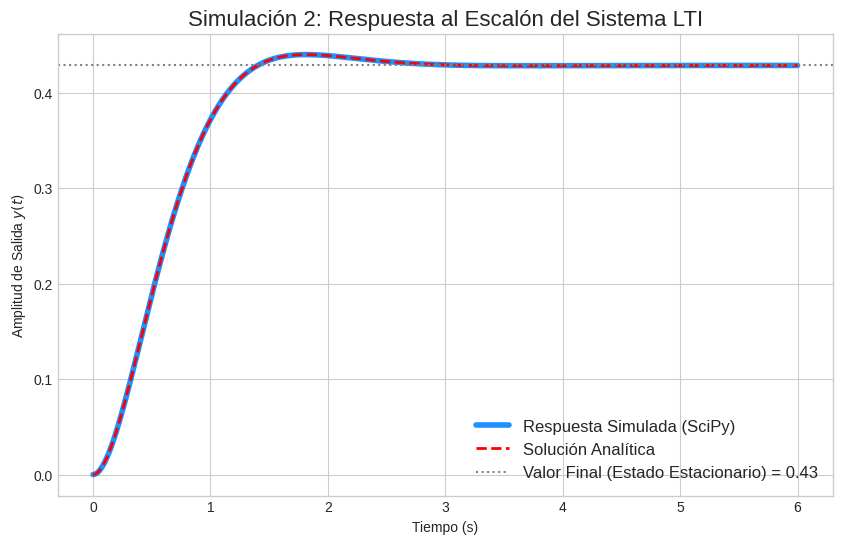

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# --- 1. Definición del sistema y parámetros ---
# H(s) = 3 / (s^2 + 4s + 7)
num = [3.0]
den = [1.0, 4.0, 7.0]
lti_system = signal.TransferFunction(num, den)

# Vector de tiempo para la simulación
t = np.linspace(0, 6, 1000)

# --- 2. Cálculo de la respuesta al escalón ---
# Simulación directa con SciPy
t_sim, y_sim = signal.step(lti_system, T=t)

# Solución analítica calculada a mano
# y(t) = (1/7) * [3 - e^(-2t) * (3*cos(sqrt(3)*t) + 2*sqrt(3)*sin(sqrt(3)*t))]
y_analytical = (1/7) * (3 - np.exp(-2*t) * (3*np.cos(np.sqrt(3)*t) + 2*np.sqrt(3)*np.sin(np.sqrt(3)*t)))

# --- 3. Gráfico ---
plt.figure(figsize=(10, 6))
plt.title('Simulación 2: Respuesta al Escalón del Sistema LTI', fontsize=16)

plt.plot(t_sim, y_sim, label='Respuesta Simulada (SciPy)', lw=4, color='dodgerblue')
plt.plot(t, y_analytical, '--', label='Solución Analítica', color='red', lw=2)

plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud de Salida $y(t)$')
plt.axhline(y=3/7, color='gray', linestyle=':', label=f'Valor Final (Estado Estacionario) = {3/7:.2f}')
plt.legend(fontsize=12)
plt.grid(True)
plt.show()